In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
# importing required libraries
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix,roc_curve

# step 1 : Reading and understanding the data

In [3]:
# reading the data and displaying the head of the data
df=pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# checking the shape
df.shape

(5110, 12)

In [5]:
# checking info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# checking five point summary of data
df.describe(include = 'all')


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


# step 2 - checking for duplicates and missing values 

__Here we are checking each id value to check ther duplicates in the data and we are taking sum of all the boolean values and equating it to zero to check if it is True__

In [7]:
# checking for duplicates
sum(df['id'].duplicated())==0

True

In [8]:
# checking the null values in DataFrame
round(df.isnull().sum()*100/len(df),2)

id                   0.00
gender               0.00
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  3.93
smoking_status       0.00
stroke               0.00
dtype: float64

__As we can see BMI is the only variable containing null values . lets check this columns for more details__

In [9]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

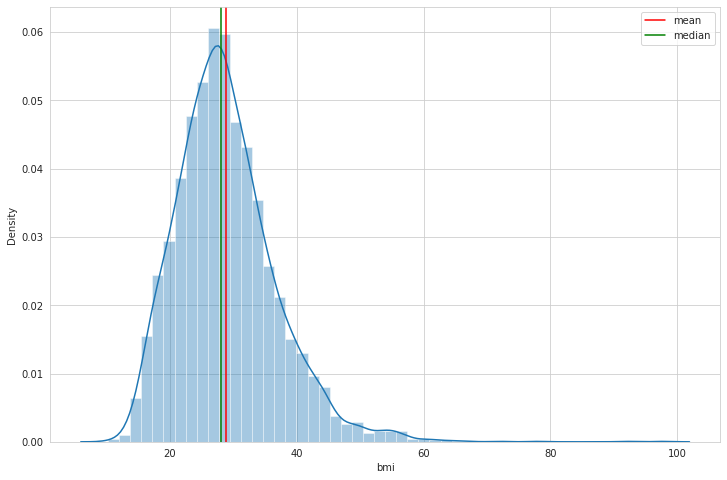

In [10]:
# distribution plot for BMI
plt.figure(figsize=[12,8])
sns.distplot(df['bmi'])
plt.axvline(df['bmi'].mean(),label='mean',color='r')
plt.axvline(df['bmi'].median(),label='median',color='g')
plt.legend()
plt.show()

__we can see from the above plot that both mean and median are close to each other. so we can replace null values with  median because median is less affected by outliers than mean__

In [11]:
# replacing null values with median
df.bmi.fillna(28.1,axis=0, inplace=True)

In [12]:
# checking for null values after null value treatment
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# step 3 : Exploratory Data Analysis

__A) univariate analysis__

In [13]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [14]:
# mapping 0 to no and 1 to yes for hyper tension and heart_disease variables
cols=['hypertension','heart_disease']
for col in cols:
    df[col]=df[col].map({1:'Yes',0:'No'})

In [15]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
# creating numerical and categorical columns in each list
num_cols=list(df.select_dtypes(include=np.number).columns)
print(num_cols)
cat_cols=list(df.select_dtypes(include='object').columns)
print(cat_cols)

['id', 'age', 'avg_glucose_level', 'bmi', 'stroke']
['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


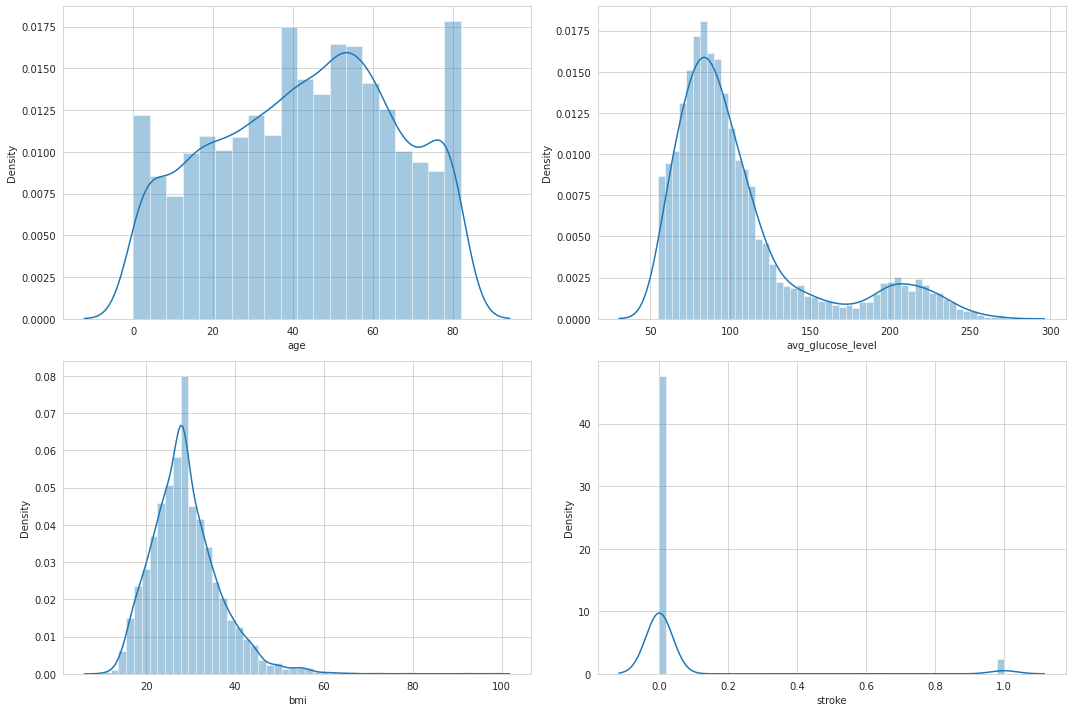

In [17]:
# checking distribution of numerical columns
plt.figure(figsize=[15,10])
for col in enumerate(num_cols[1:]):
    plt.subplot(2,2,col[0]+1)
    sns.distplot(df[col[1]])
    plt.tight_layout()
plt.show()

# countplots for categorical columns

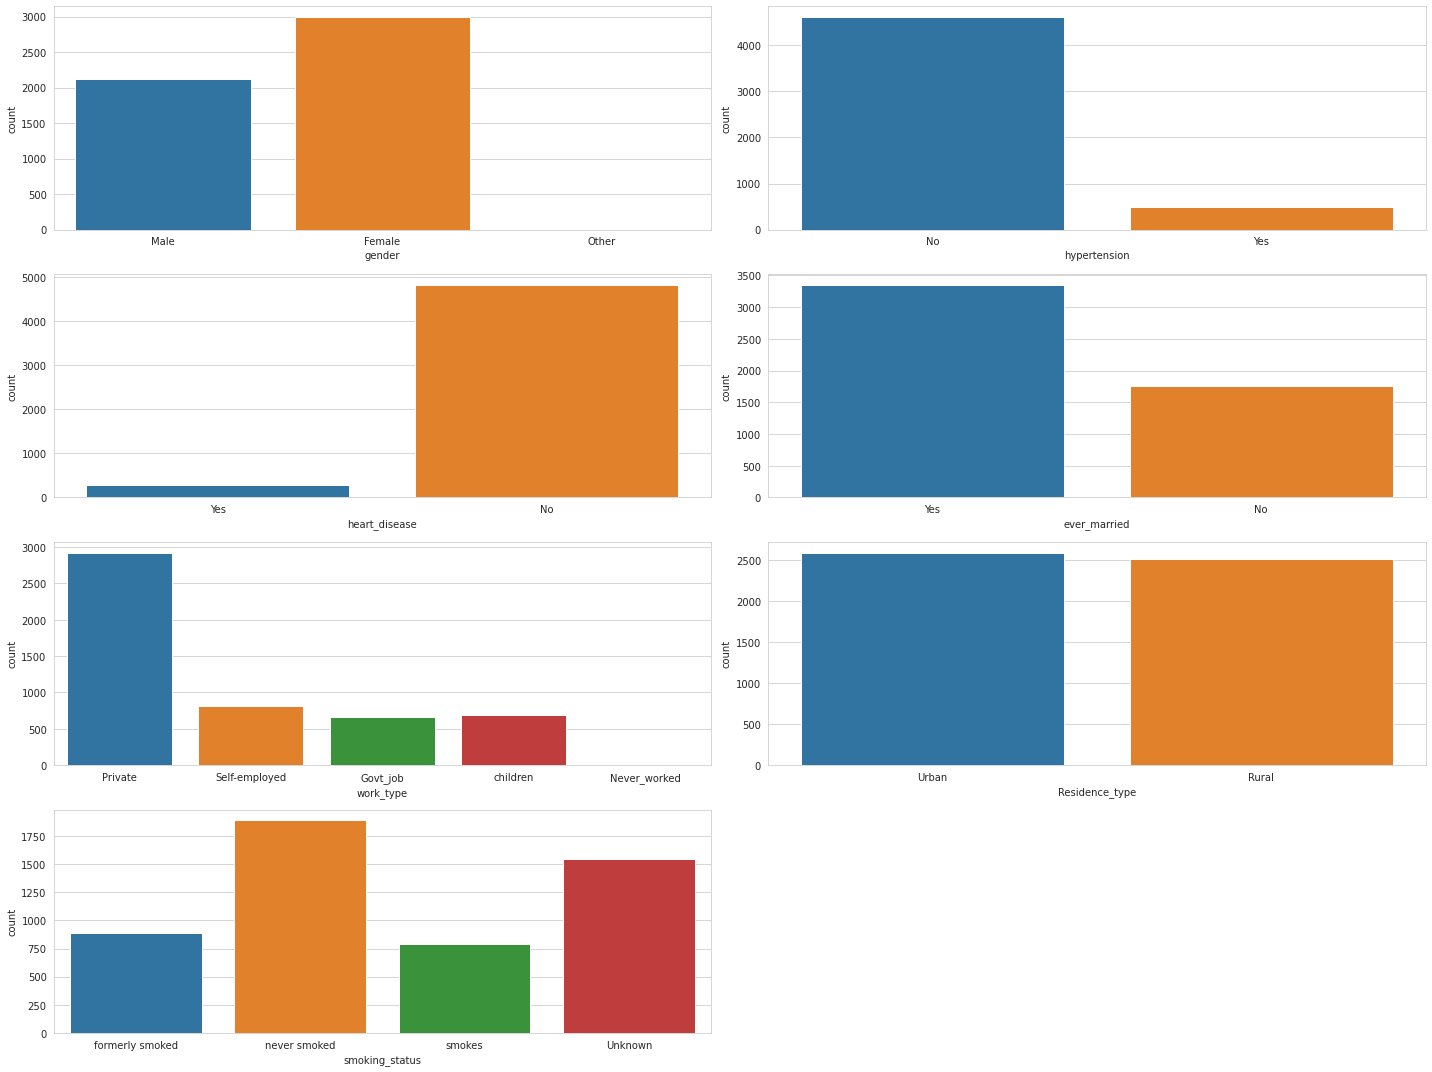

In [18]:
# checking countplot for categorical columns 
plt.figure(figsize=[20,15])
for col in enumerate(cat_cols):
    plt.subplot(4,2,col[0]+1)
    sns.countplot(df[col[1]])
    plt.tight_layout()
plt.show()

## b) Bivariate Analysis

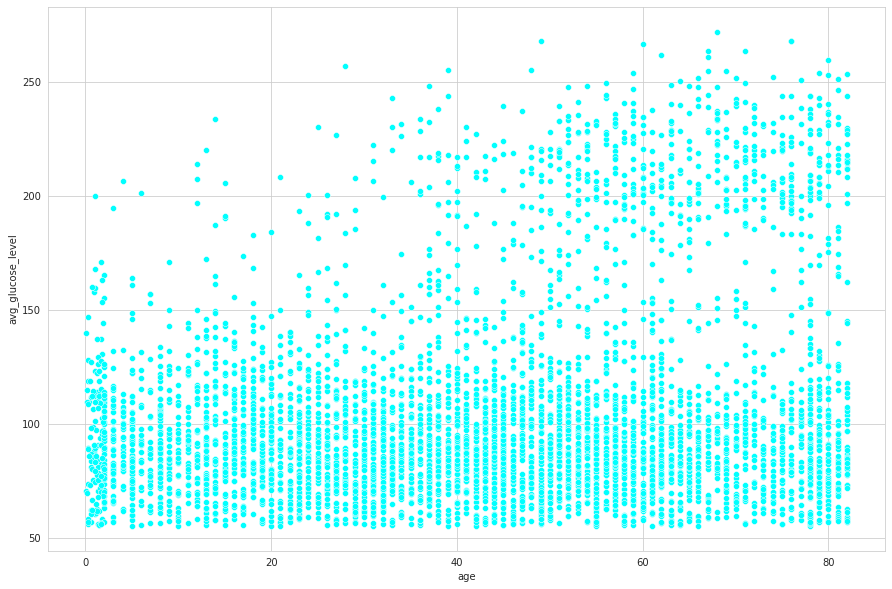

In [19]:
# scatter plot for age vs average_glucose_level
plt.figure(figsize=[15,10])
sns.scatterplot(df['age'],df['avg_glucose_level'],color='cyan')
plt.show()

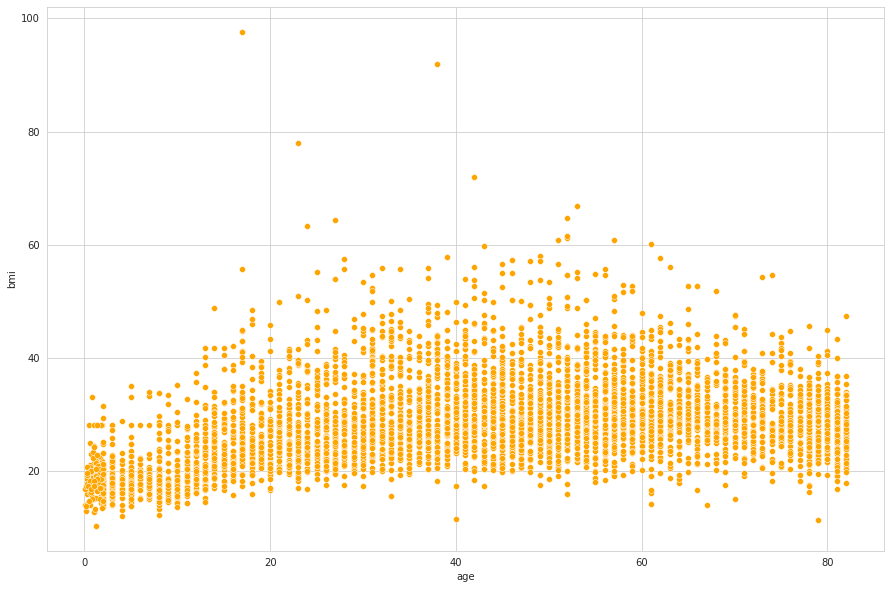

In [20]:
# scatter plot for age vs bmi
plt.figure(figsize=[15,10])
sns.scatterplot(df['age'],df['bmi'],color='orange')
plt.show()

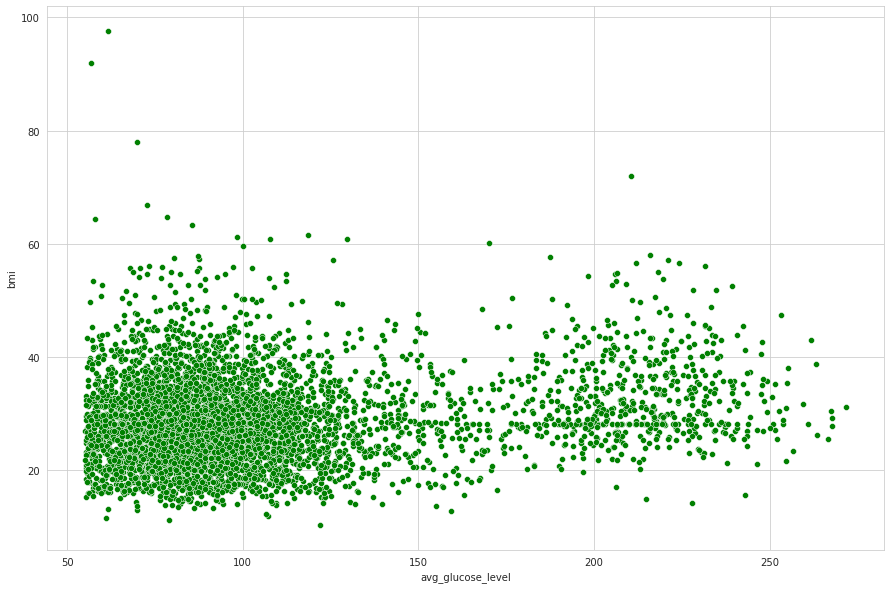

In [21]:
# scatter plot for avg_glucose_level vs bmi
plt.figure(figsize=[15,10])
sns.scatterplot(df['avg_glucose_level'],df['bmi'],color='g')
plt.show()

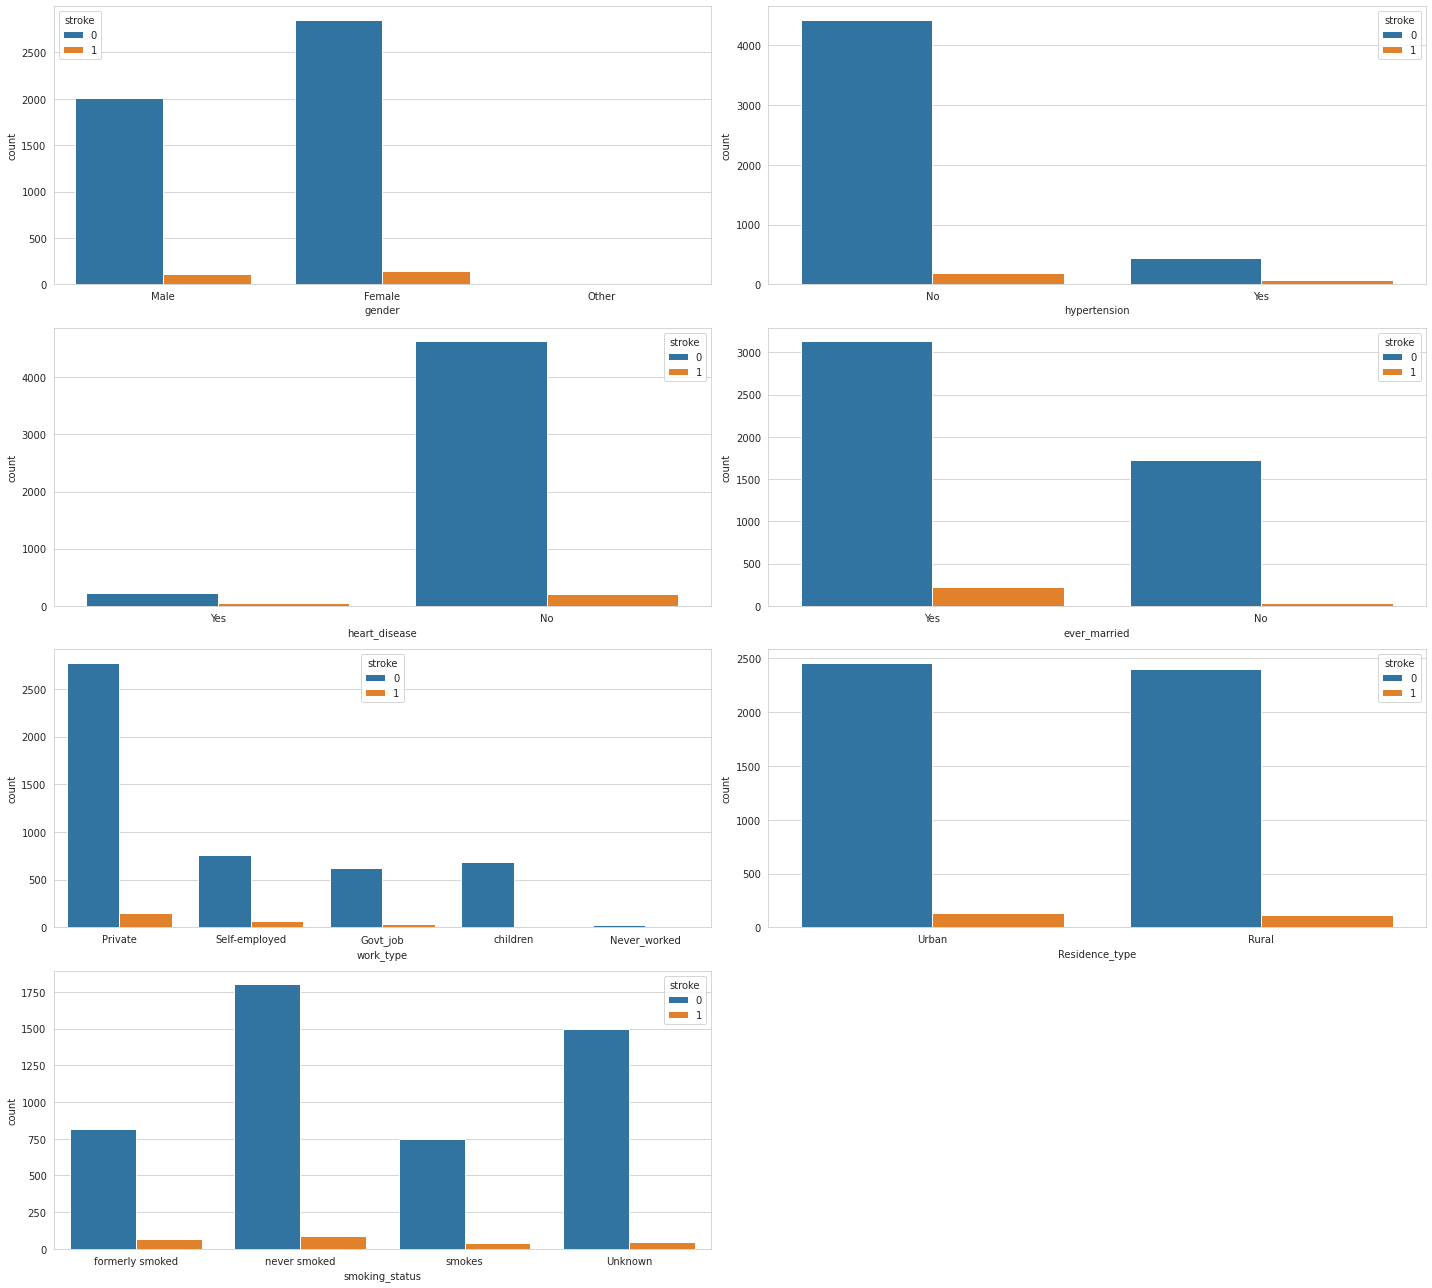

In [22]:
# checking countplot with stroke for categorical columns 
plt.figure(figsize=[20,18])
for col in enumerate(cat_cols):
    plt.subplot(4,2,col[0]+1)
    sns.countplot(df[col[1]],hue=df['stroke'])
    plt.tight_layout()
plt.show()


<Figure size 1440x864 with 0 Axes>

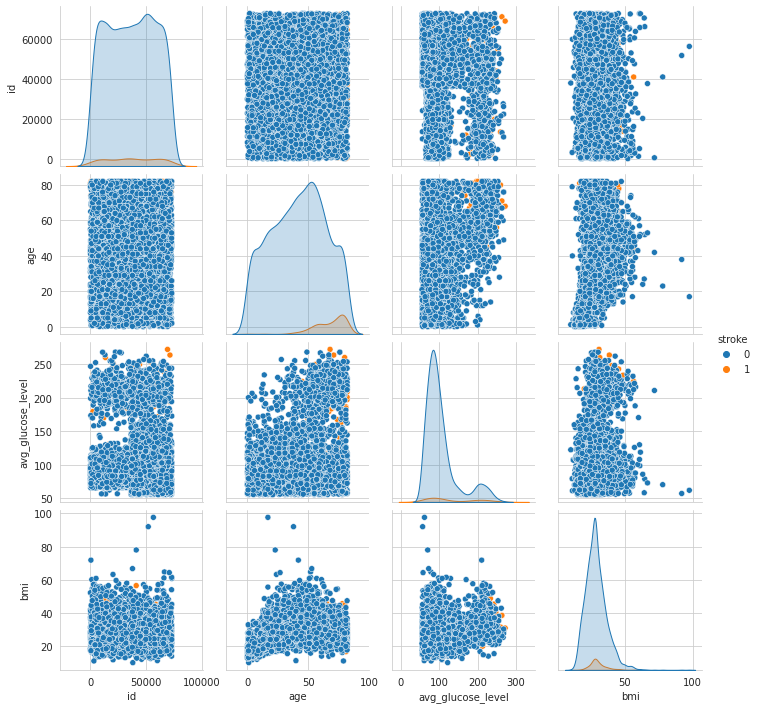

In [23]:
# pair plot 
plt.figure(figsize=[20,12])
sns.pairplot(data=df,hue='stroke')
plt.show()

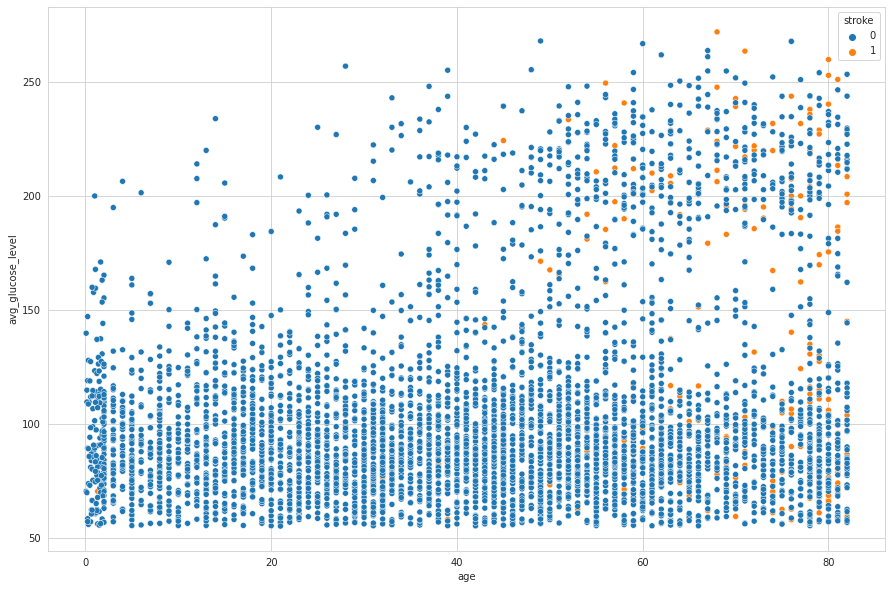

In [24]:
plt.figure(figsize=[15,10])
sns.scatterplot(df['age'],df['avg_glucose_level'],hue=df['stroke'],color='cyan')
plt.show()

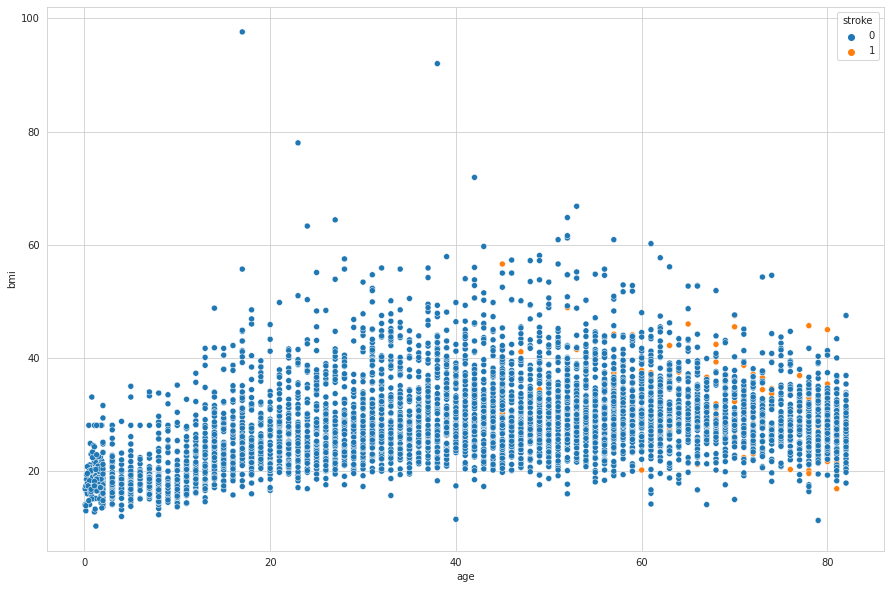

In [25]:
plt.figure(figsize=[15,10])
sns.scatterplot(df['age'],df['bmi'],hue=df['stroke'])
plt.show()


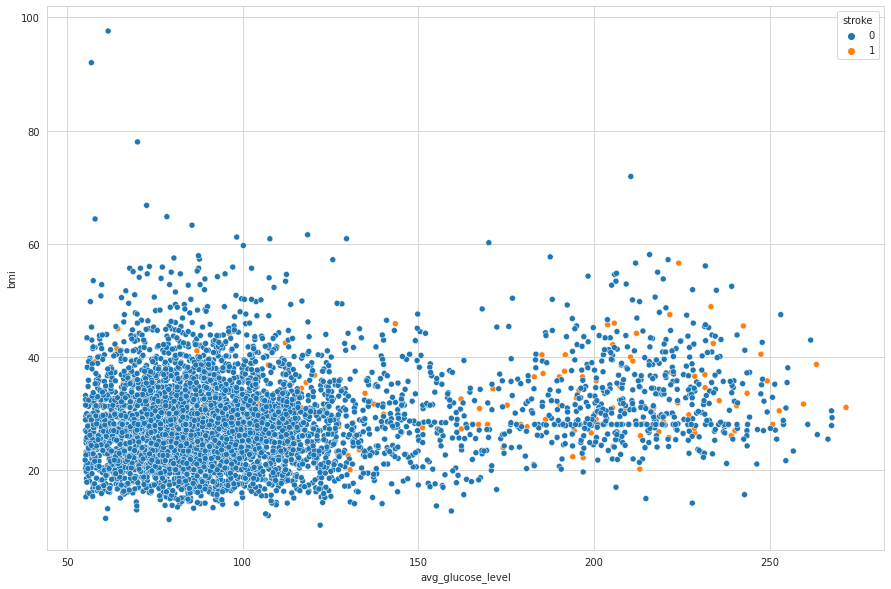

In [26]:
plt.figure(figsize=[15,10])
sns.scatterplot(df['avg_glucose_level'],df['bmi'],hue=df['stroke'])
plt.show()

## c)Multivariate analysis

In [27]:
# correlation matrix
df.corr()

,id,age,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.001092,0.005555,0.006388
age,0.003538,1.000000,0.238171,0.324296,0.245257
avg_glucose_level,0.001092,0.238171,1.000000,0.166876,0.131945
bmi,0.005555,0.324296,0.166876,1.000000,0.036110
stroke,0.006388,0.245257,0.131945,0.036110,1.000000


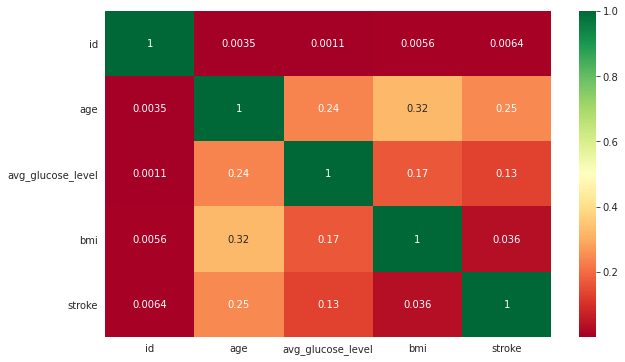

In [28]:
# heatmap
plt.figure(figsize=[10,6])
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True)
plt.show()

# Step 4 : Outlier Treatment

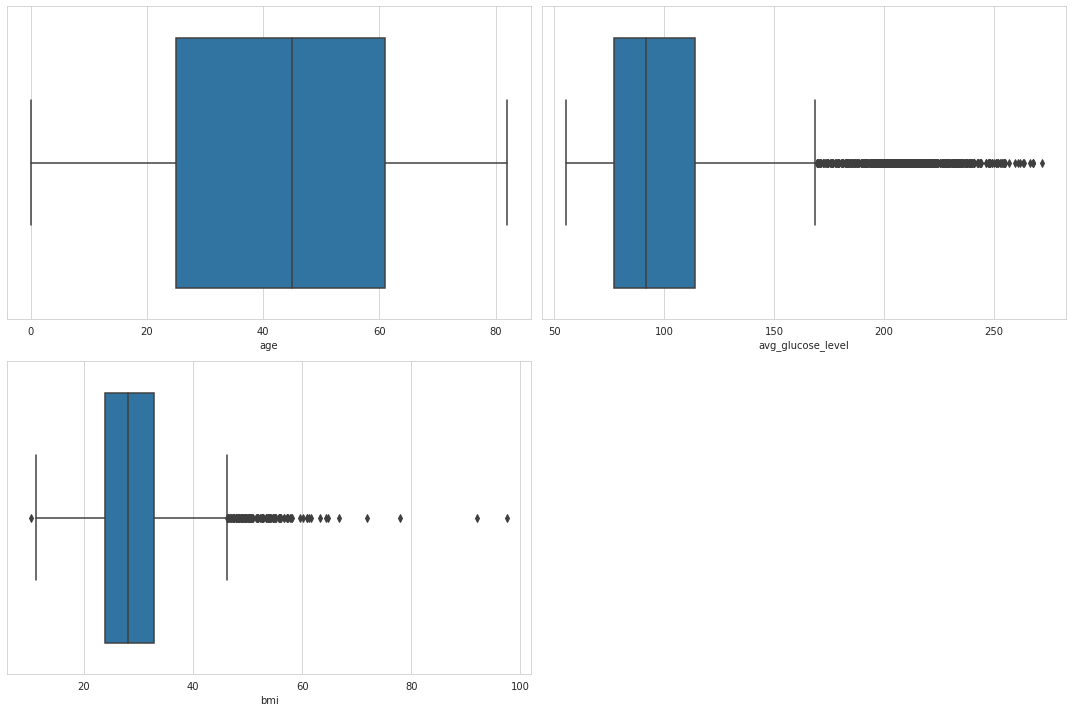

In [29]:
# checking for outliers in numerical columns
plt.figure(figsize=[15,10])
for col in enumerate(num_cols[1:-1]):
    plt.subplot(2,2,col[0]+1)
    sns.boxplot(df[col[1]])
    plt.tight_layout()
plt.show()

__we can see that avg_glucose_level and bmi are having so many outliers so treating them with various preprocessing techniques and iqr iqr capping method__

In [30]:
# IQR capping method
# x = df.describe()
# for i in num_cols[2:-1]:
#     q1=x.loc['25%',i]
#     q3=x.loc['75%',i]
#     iqr=q3-q1
#     uppl=q3+(1.5*iqr)
#     lowl=q1-(1.5*iqr)
#     df[i]=df[i].apply(lambda x:uppl if x>uppl else x )
#     df[i]=df[i].apply(lambda x: lowl if x<lowl else x)

In [31]:

# plt.figure(figsize=[15,10])
# for col in enumerate(num_cols[1:-1]):
#     plt.subplot(2,2,col[0]+1)
#     sns.boxplot(df[col[1]])
#     plt.tight_layout()
# plt.show()

In [32]:
df.shape

(5110, 12)

## step 5: Dummies Creation

In [33]:
x=df.drop(['stroke','id'],axis=1)
y=df['stroke']

In [34]:
# creating dummies
xd=pd.get_dummies(x,drop_first=True)
xd.head()

,age,avg_glucose_level,bmi,gender_Male,gender_Other,hypertension_Yes,heart_disease_Yes,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.6,1,0,0,1,1,0,1,0,0,1,1,0,0
1,61.0,202.21,28.1,0,0,0,0,1,0,0,1,0,0,0,1,0
2,80.0,105.92,32.5,1,0,0,1,1,0,1,0,0,0,0,1,0
3,49.0,171.23,34.4,0,0,0,0,1,0,1,0,0,1,0,0,1
4,79.0,174.12,24.0,0,0,1,0,1,0,0,1,0,0,0,1,0


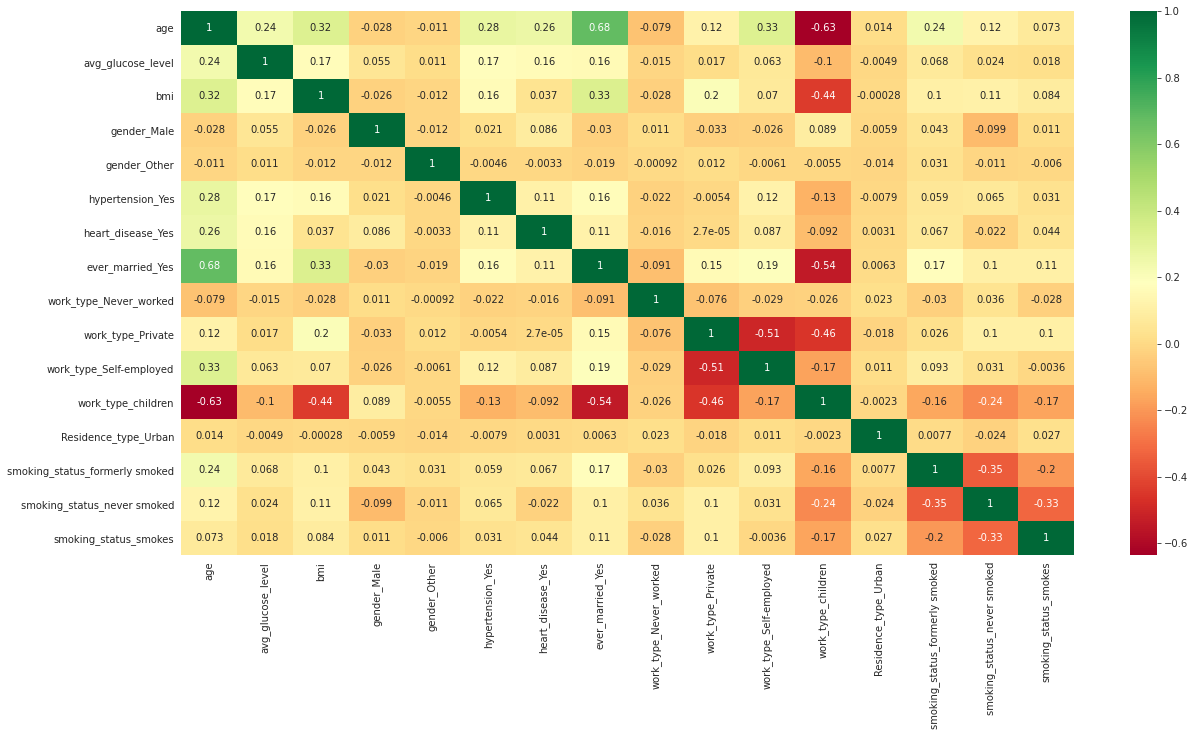

In [35]:
# checking the correlation after creating the dummies
plt.figure(figsize=[20,10])
sns.heatmap(xd.corr(),annot=True,cmap='RdYlGn')
plt.show()

## Step 6 : Train Test Split 

In [36]:
x_train,x_test,y_train,y_test=train_test_split(xd,y,test_size=0.3,random_state=100)

In [37]:
# checking the shape of x_train x_test y_train y_test
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3577, 16), (1533, 16), (3577,), (1533,))

# scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
cols_to_scale=['age','avg_glucose_level','bmi']

In [40]:
# creating scaler instance
scaler=MinMaxScaler()

# fit transform for x_train
x_train[cols_to_scale]=scaler.fit_transform(x_train[cols_to_scale])

# transforming for x_test
x_test[cols_to_scale]=scaler.transform(x_test[cols_to_scale])

In [41]:
x_train.head()

,age,avg_glucose_level,bmi,gender_Male,gender_Other,hypertension_Yes,heart_disease_Yes,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1572,0.145508,0.040876,0.090493,1,0,0,0,0,0,0,0,1,1,0,0,0
290,0.157715,0.275322,0.091638,1,0,0,0,0,0,0,0,1,1,0,0,0
0,0.816895,0.801164,0.301260,1,0,0,1,1,0,1,0,0,1,1,0,0
4166,0.560547,0.273567,0.164948,1,0,0,0,1,0,1,0,0,0,1,0,0
2201,0.841309,0.651702,0.171821,0,0,0,1,1,0,1,0,0,1,0,1,0


# Step 7 : Model building

## Base model

In [42]:
# creating an instance for logistic regression
logreg=LogisticRegression(solver='liblinear')

In [43]:
logreg.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [44]:
y_train_pred=logreg.predict(x_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
accuracy_score(y_train,y_train_pred)

0.9496785015376014

In [46]:
y_train_prob=logreg.predict_proba(x_train)[:,1]
y_train_prob

array([0.00410348, 0.0050367 , 0.16976749, ..., 0.29206631, 0.02419631,
       0.07460933])

In [47]:
roc_auc_score(y_train,y_train_prob)

0.8426978052530011

In [48]:
print(confusion_matrix(y_train,y_train_pred))

[[3397    0]
 [ 180    0]]


In [49]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(12, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [50]:
from sklearn import metrics

In [51]:
fpr,tpr,thresholds=metrics.roc_curve(y_train_pred,y_train_prob,drop_intermediate=False)

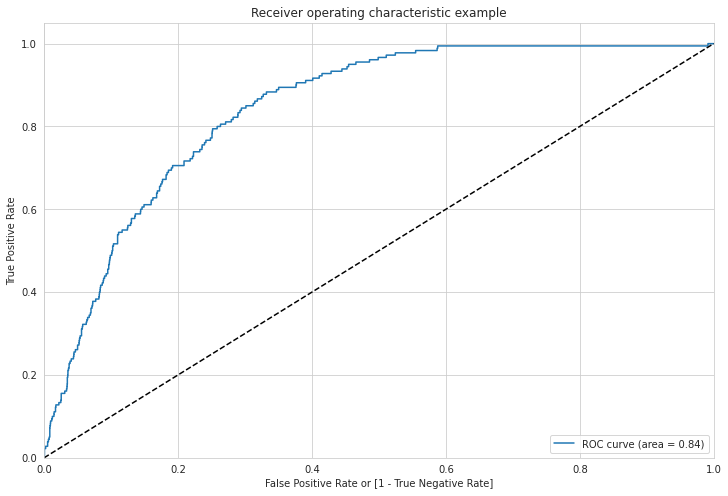

In [52]:
draw_roc(y_train,y_train_prob)

In [53]:
y_test_pred=logreg.predict(x_test)
accuracy_score(y_test,y_test_pred)

0.9549902152641878

In [54]:
print(confusion_matrix(y_test,y_test_pred))

[[1464    0]
 [  69    0]]


# Final model : gradient boosting

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV,StratifiedKFold
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform


In [56]:
gbc=GradientBoostingClassifier()

params={'n_estimators':sp_randint(50,250),'max_depth':sp_randint(1,15),
        'learning_rate':sp_uniform(0,0.5),'learning_rate':range(0,2)}

r_search=RandomizedSearchCV(estimator=gbc,param_distributions=params,cv=3,n_iter=10,scoring='roc_auc',
                           random_state=4,n_jobs=-1)

print(r_search.fit(xd,y))
print(r_search.best_params_)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': range(0, 2),
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa01817e550>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa01817e350>},
                   random_state=4, scoring='roc_auc')
{'learning_rate': 1, 'max_depth': 1, 'n_estimators': 233}


In [57]:
gbc=GradientBoostingClassifier(**r_search.best_params_,random_state=4)
gbc.fit(x_train,y_train)
y_train_pred=gbc.predict(x_train)
y_train_prob=gbc.predict_proba(x_train)[:,1]
print('train - confusion matrix : ','\n',confusion_matrix(y_train,y_train_pred))
print('train - accuracy score : ','\n', accuracy_score(y_train,y_train_pred))
print('train - AUC : ', roc_auc_score(y_train,y_train_prob))

y_pred=gbc.predict(x_test)
y_prob=gbc.predict_proba(x_test)[:,1]
print('test - confusion matrix : ','\n',confusion_matrix(y_test,y_pred))
print('test - accuracy score : ','\n', accuracy_score(y_test,y_pred))
print('test - AUC : ', roc_auc_score(y_test,y_prob))

train - confusion matrix :  
 [[3343   54]
 [ 164   16]]
train - accuracy score :  
 0.9390550740844283
train - AUC :  0.8819317698622968
test - confusion matrix :  
 [[1434   30]
 [  68    1]]
test - accuracy score :  
 0.9360730593607306
test - AUC :  0.8110398352736201


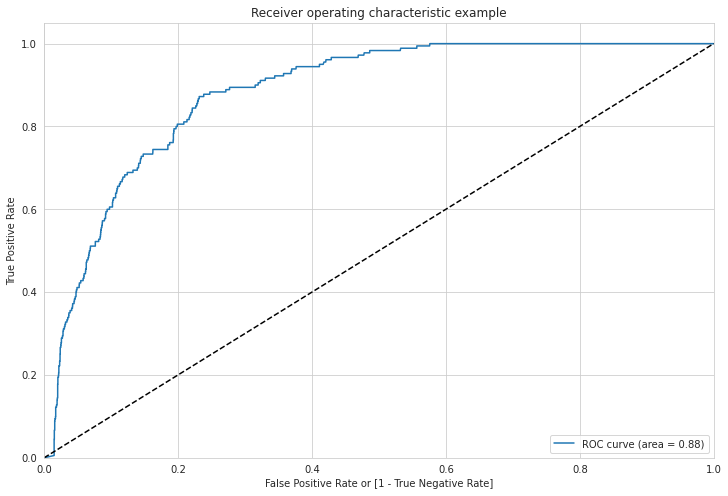

In [58]:
draw_roc(y_train,y_train_prob)

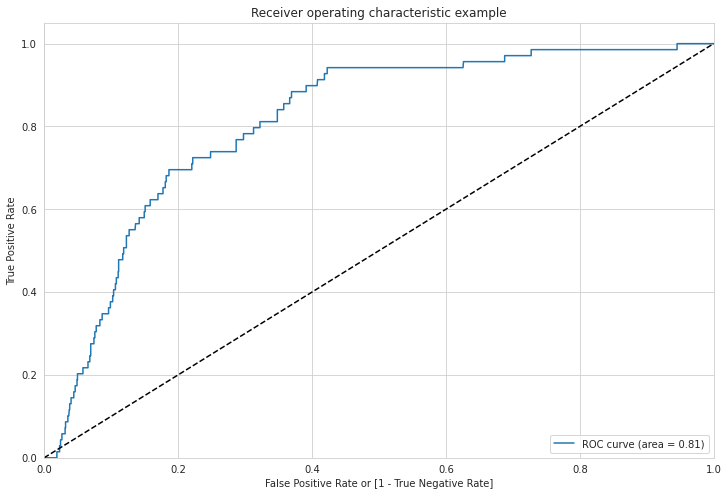

In [59]:
draw_roc(y_test,y_prob)